# OpenAI Gym

In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gym

def run_simulation(env, step_fn):
    fig = plt.figure()
    array = env.render(mode='rgb_array')
    im = plt.imshow(array, animated=True)
    plt.xticks([])
    plt.yticks([])
    text = plt.text(10,array.shape[0]-10,'')

    def update(*args):
        info = step_fn()
        im.set_array(env.render(mode='rgb_array'))
        text.set_text(info)
        return im, text
    
    global _ani
    _ani = animation.FuncAnimation(fig, update, interval=50, blit=True)
    plt.show()

## 環境の生成
関数gym.makeに環境名を渡すと環境を生成できる．使用できる環境は以下を参照．

https://gym.openai.com/envs

In [17]:
env = gym.make('CartPole-v0')
print(env.action_space)        # 行動値の空間（値の集合）
print(env.observation_space)   # 観測値の空間
print(env.reward_range)        # 報酬値の範囲

Discrete(2)
Box(4,)
(-inf, inf)


## 環境の初期化
メソッドresetを呼び出すと環境がランダムに初期化され，初期状態が返される．
CartPole-v0の場合，状態は[台車の位置，台車の速度，振子の角度，振子の角速度]のように表現される．

In [8]:
state = env.reset()    #初期化して初期状態を返す
print(state)

[-0.0367544   0.02639426  0.03205572  0.02637075]


## 描画
メソッドrenderを呼び出すとウインドウが開いて環境の現在の状態が描画される．
引数にmode='rgb_array'を指定すると，画像が[高さ,幅,RGB]の三次元配列として返ってくる．
ここではJupyter上で表示するために後者の方法を使っている．

<IPython.core.display.Javascript object>


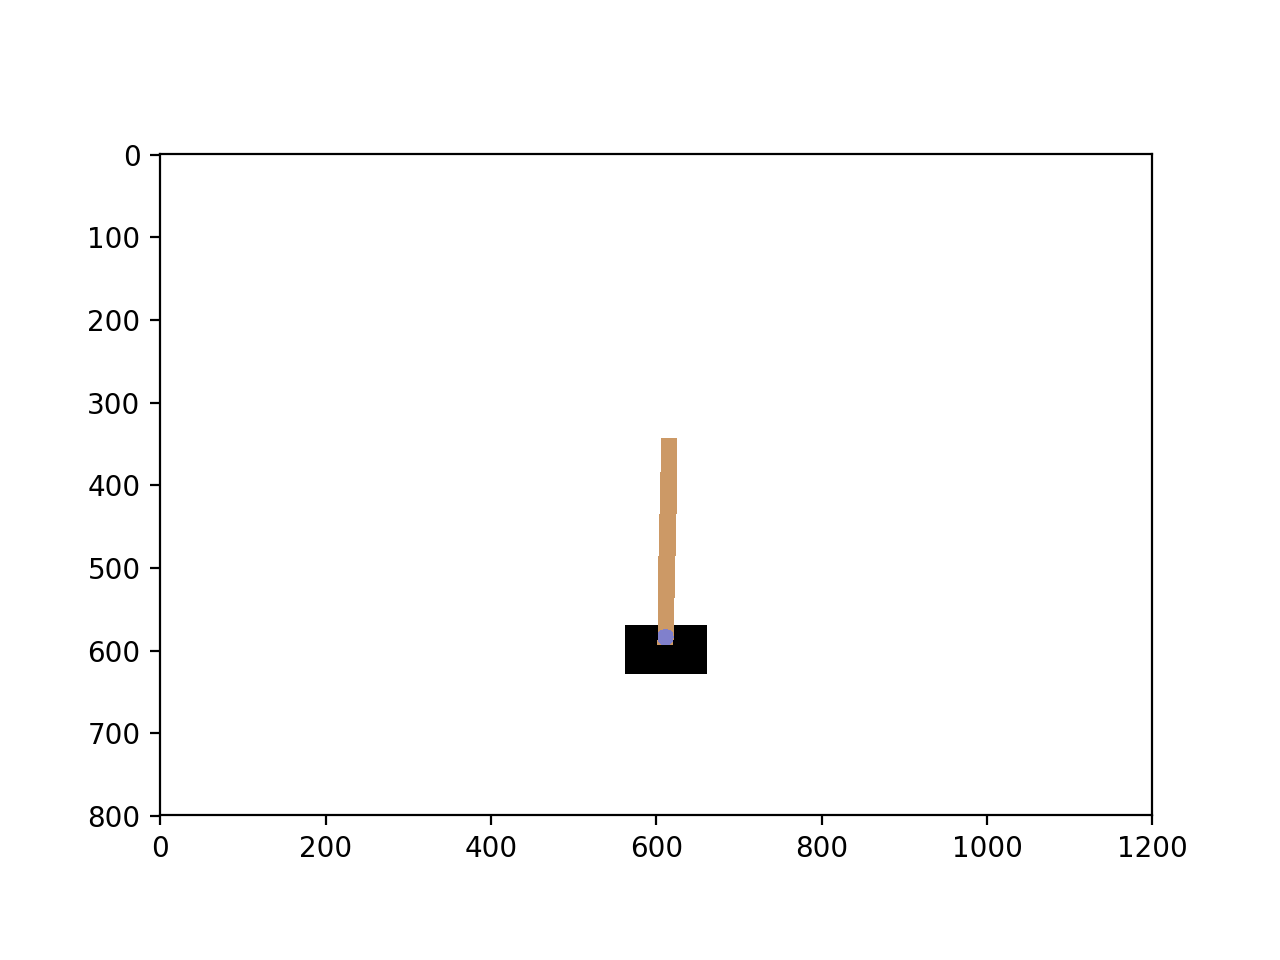

In [4]:
env.render(mode='rgb_array')
plt.figure()
plt.imshow(env.render(mode='rgb_array'))
plt.show()

## 状態の更新
メソッドstepに行動値を渡すと，その行動を実行して状態が遷移する．
CartPole-v0の場合，行動空間はDiscrete(2)なので，有効な行動値は0（左に加速）か1（右に加速）となる．
次の状態，報酬(float)，終了か否か(bool)，その他の情報(dict)がこの順のタプルとして返ってくる．

In [5]:
env.step(1)

(array([ 0.04679907,  0.21828677,  0.01990498, -0.27108945]), 1.0, False, {})

## ランダムな行動をとってみる

<IPython.core.display.Javascript object>


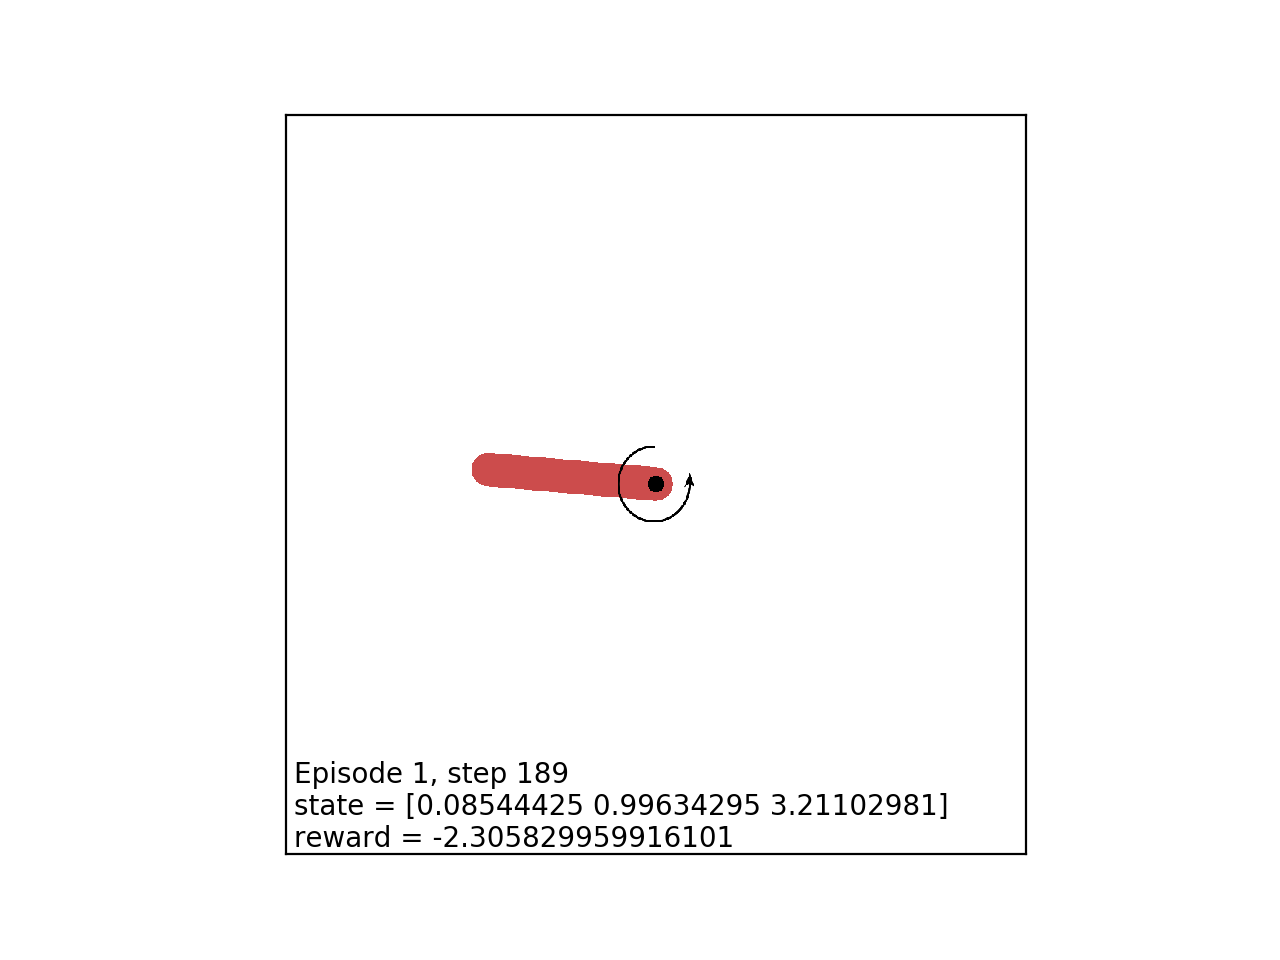

In [3]:
env = gym.make('Pendulum-v0')
env.reset()

episode = 1
t = 0

def step():
    global episode, t
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    t += 1
    if done:
        env.reset()
        episode += 1
        t = 0
    return 'Episode {}, step {}\nstate = {}\nreward = {}'.format(episode, t, str(state), reward)

run_simulation(env, step)